Note: you may need to restart the kernel to use updated packages.
1. Loading and Initial Setup
Using default location ~/mne_data for EEGBCI...
Creating C:\Users\cmmon\mne_data


c:\Users\cmmon\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Attempting to create new mne-python configuration file:
C:\Users\cmmon\.mne\mne-python.json
Download complete in 36s (7.4 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Event IDs: {'T0': 1, 'T1': 2, 'T2': 3}


<Figure size 1000x500 with 0 Axes>

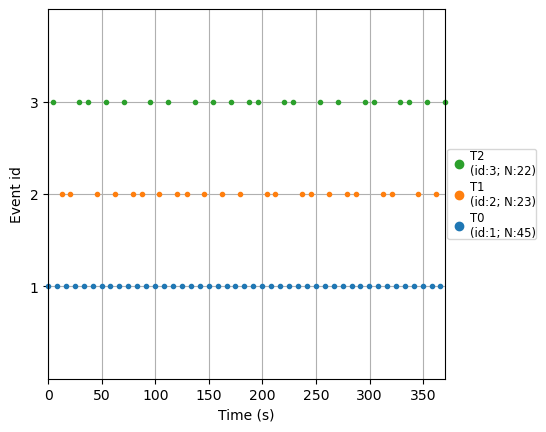

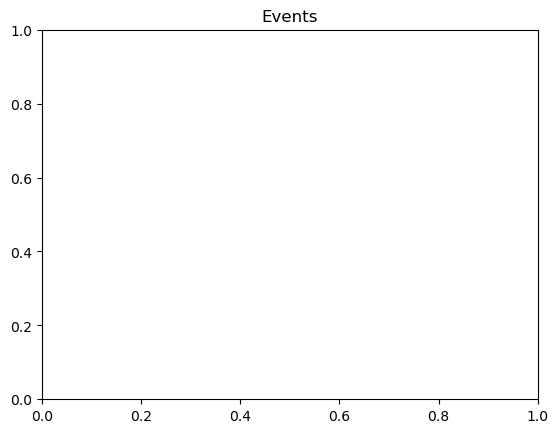

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
<Epochs | 45 events (all good), 0 – 4 s (baseline off), ~14.1 MiB, data loaded,
 'left_hand': 23
 'right_hand': 22>

3. Visualizing the Data


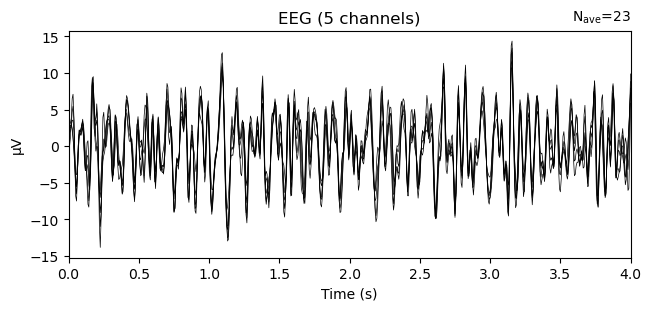

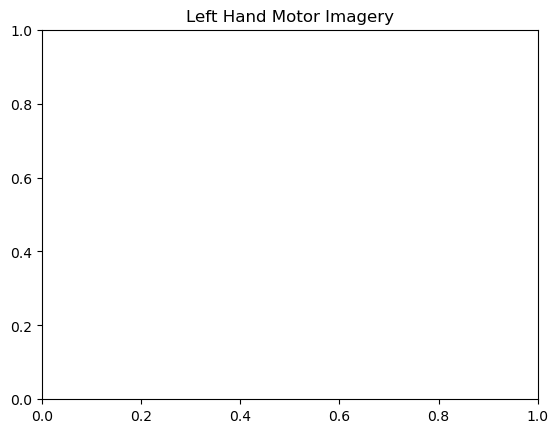

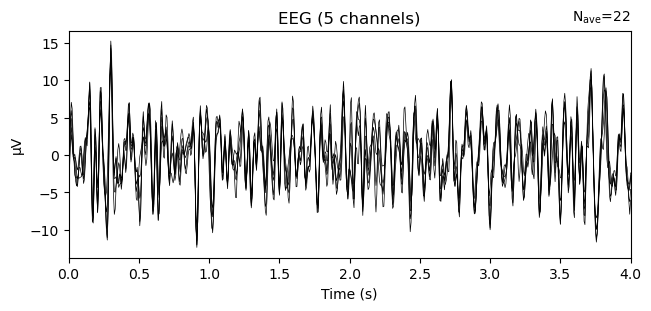

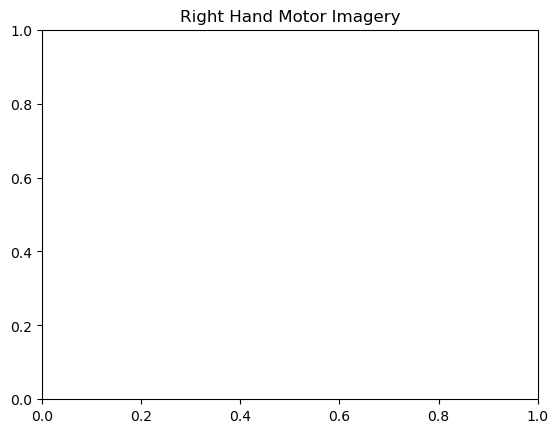

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    1.9s finished


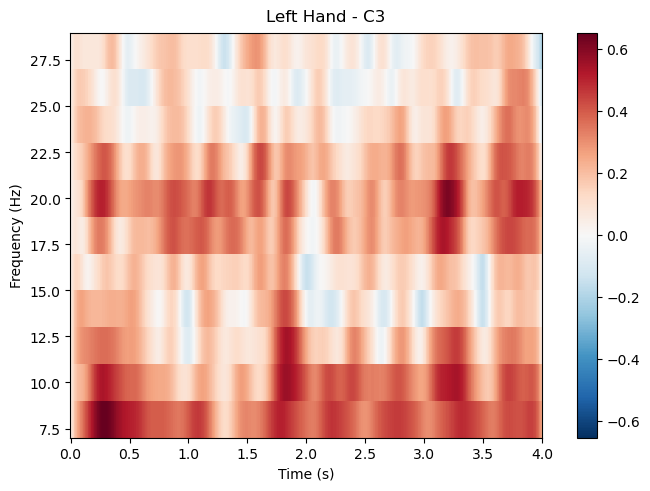

Applying baseline correction (mode: logratio)


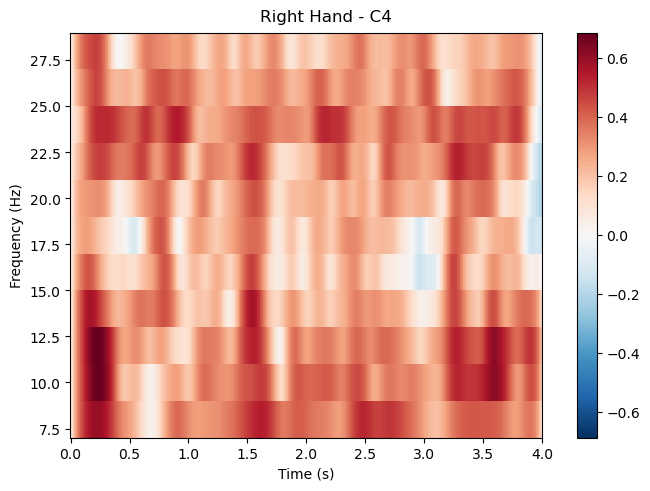


4. Preparing Data for CNN
Data shape: (45, 64, 641)
Labels shape: (45,)
Unique labels: [0 1]
Training set: 36 samples
Testing set: 9 samples

5. Building the CNN Model
Using device: cpu
EEGNet(
  (conv1): Sequential(
    (0): Conv1d(64, 32, kernel_size=(50,), stride=(1,), padding=(25,), bias=False)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.25, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv1d(32, 64, kernel_size=(8,), stride=(1,), padding=(4,), bias=False)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.25, inplace=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=2560, out_features=2, bias=True)
  )
)

6. Training the Model
Epo

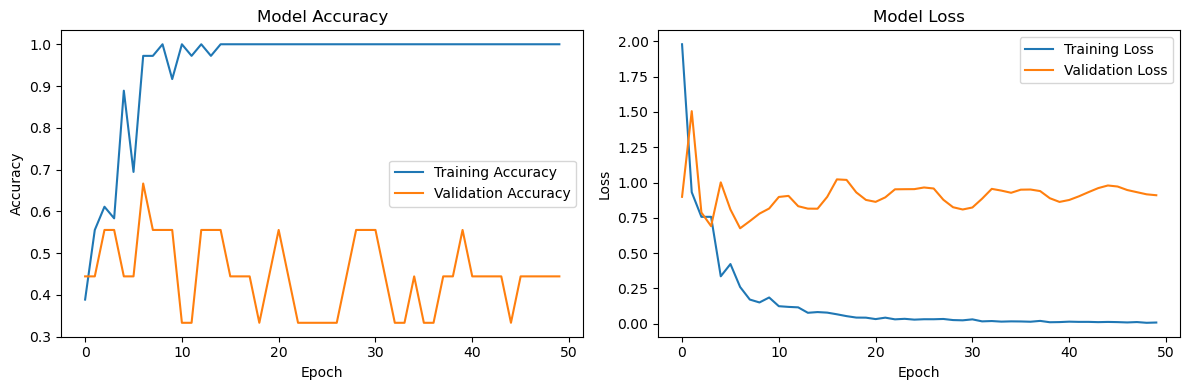

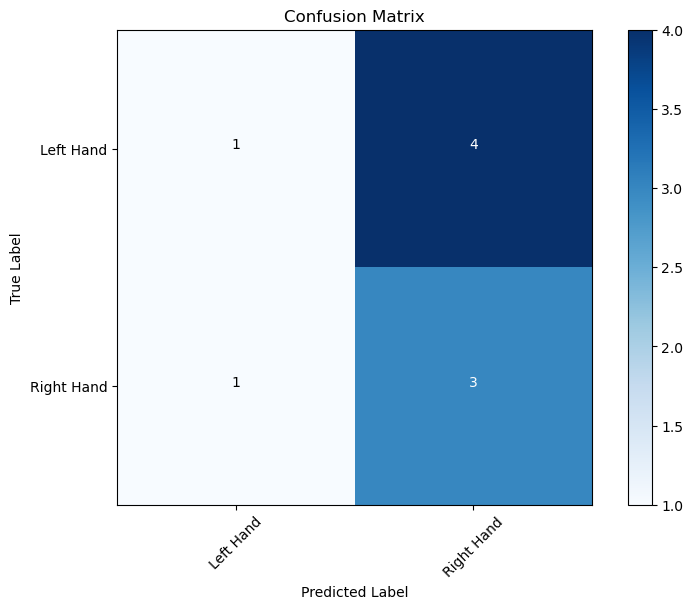


Classification Report:
              precision    recall  f1-score   support

   Left Hand       0.50      0.20      0.29         5
  Right Hand       0.43      0.75      0.55         4

    accuracy                           0.44         9
   macro avg       0.46      0.47      0.42         9
weighted avg       0.47      0.44      0.40         9


8. Visualizing Model Activations


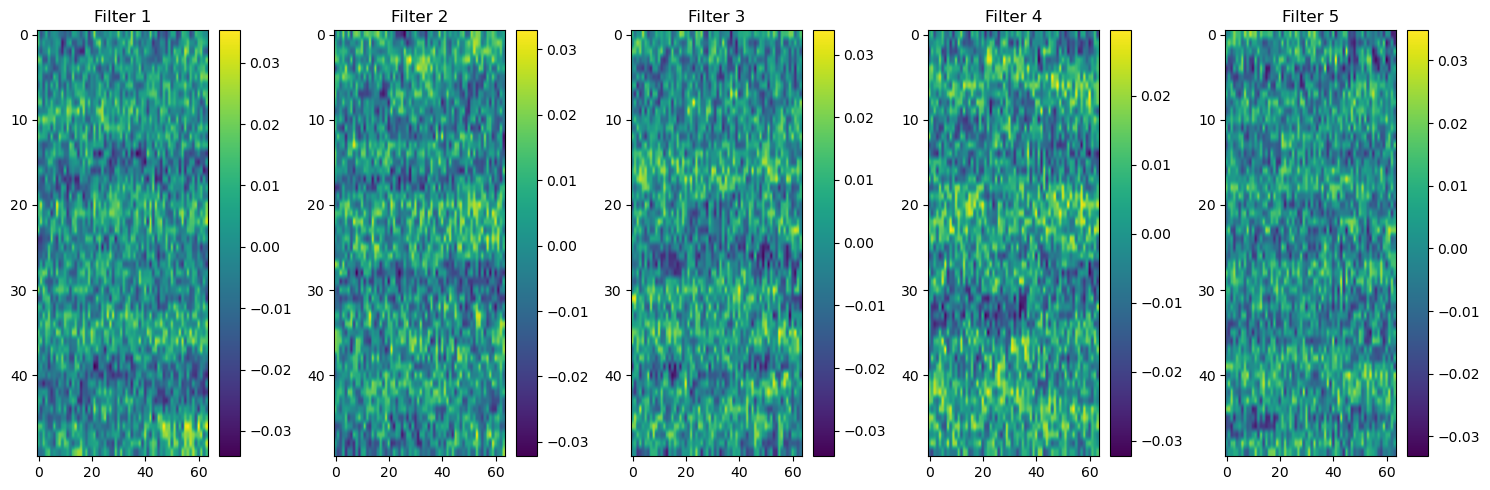

Model saved to eeg_cnn_model.pt


In [ ]:
%pip install mne

import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne.io import read_raw_edf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Set random seed for reproducibility
np.random.seed(42) 
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

print("1. Loading and Initial Setup")
# Parameters
subject_id = 1 # subject id for patient 1
runs = [4, 8, 12]  # Motor imagery runs (left/right hand)
NUM_CLASSES = 2  # Left hand vs right hand

# Downloading and loading the dataset of PhysioNet
print(f"Downloading data for subject {subject_id}, runs {runs}...")
raw_fnames = eegbci.load_data(subject_id, runs)
raw_files = [read_raw_edf(f, preload=True) for f in raw_fnames]
raw = mne.concatenate_raws(raw_files)

# Rename channels to standard naming
eegbci.standardize(raw)

# Print info about the data
print(raw.info)

print("\n2. Preprocessing the Data")
# Apply bandpass filter (8-30 Hz, mu and beta rhythms)
raw.filter(8., 30., fir_design='firwin')

# Extract events
events, event_id = mne.events_from_annotations(raw)
print(f"Event IDs: {event_id}")

# Plot events
plt.figure(figsize=(10, 5))
mne.viz.plot_events(events, event_id=event_id, sfreq=raw.info['sfreq'])
plt.title('Events')
plt.show()

# Create epochs (time windows around events)
tmin, tmax = 0., 4.  # Define epoch window (seconds)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False)

# Extract epochs for left and right hand motor imagery
event_dict = {'left_hand': event_id['T1'], 'right_hand': event_id['T2']}
epochs = mne.Epochs(raw, events, event_dict, tmin, tmax, proj=True, picks=picks,
                   baseline=None, preload=True)

# Print info about the epochs
print(epochs)

print("\n3. Visualizing the Data")
# Plot the average EEG signal for each class
epochs['left_hand'].average().plot(picks=picks[:5])
plt.title('Left Hand Motor Imagery')
plt.show()

epochs['right_hand'].average().plot(picks=picks[:5])
plt.title('Right Hand Motor Imagery')
plt.show()

# Plot time-frequency representation
freqs = np.arange(8, 30, 2)  # Frequencies of interest
n_cycles = freqs / 2.  # Different number of cycles per frequency

# Compute power for left hand
power_left = mne.time_frequency.tfr_morlet(epochs['left_hand'], freqs=freqs, 
                                          n_cycles=n_cycles, return_itc=False)
# Compute power for right hand
power_right = mne.time_frequency.tfr_morlet(epochs['right_hand'], freqs=freqs, 
                                           n_cycles=n_cycles, return_itc=False)

# Plot time-frequency representation for a central channel (C3 and C4)
power_left.plot([power_left.ch_names.index('C3')], baseline=(-0.5, 0), 
               mode='logratio', title='Left Hand - C3')
power_right.plot([power_right.ch_names.index('C4')], baseline=(-0.5, 0), 
                mode='logratio', title='Right Hand - C4')

print("\n4. Preparing Data for CNN")
# Get the data and labels
X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
y = epochs.events[:, 2] - event_id['T1']  # Convert event IDs to 0 and 1

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Unique labels: {np.unique(y)}")

# Normalize the data
X = (X - X.mean(axis=2, keepdims=True)) / (X.std(axis=2, keepdims=True) + 1e-8)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")

print("\n5. Building the CNN Model")
# Define the CNN model
class EEGNet(nn.Module):
    def __init__(self, n_channels, n_times, n_classes):
        super(EEGNet, self).__init__()
        
        # First convolutional block
        self.conv1 = nn.Sequential(
            nn.Conv1d(n_channels, 32, kernel_size=50, stride=1, padding=25, bias=False),
            nn.BatchNorm1d(32),
            nn.ELU(),
            nn.MaxPool1d(kernel_size=4, stride=4),
            nn.Dropout(0.25)
        )
        
        # Second convolutional block
        self.conv2 = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=8, stride=1, padding=4, bias=False),
            nn.BatchNorm1d(64),
            nn.ELU(),
            nn.MaxPool1d(kernel_size=4, stride=4),
            nn.Dropout(0.25)
        )
        
        # Calculate the size of the flattened features
        self.n_features = 64 * (n_times // 16)  # After two pooling layers with stride 4
        
        # Fully connected layer
        self.fc = nn.Sequential(
            nn.Linear(self.n_features, n_classes)
        )
    
    def forward(self, x):
        # x shape: [batch, channels, time]
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(-1, self.n_features)
        x = self.fc(x)
        return x

# Initialize the model
n_channels = X.shape[1]
n_times = X.shape[2]
n_classes = len(np.unique(y))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = EEGNet(n_channels, n_times, n_classes).to(device)
print(model)

print("\n6. Training the Model")
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 50

# Lists to store metrics
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    
    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accs.append(val_epoch_acc)
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"  Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
        print(f"  Validation Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_acc:.4f}")

print("Training complete")

print("\n7. Evaluating the Model")
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
model.eval()

# Make predictions
with torch.no_grad():
    outputs = model(X_test_tensor.to(device))
    _, predicted = torch.max(outputs, 1)

# Convert predictions to numpy for evaluation
y_pred = predicted.cpu().numpy()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Left Hand', 'Right Hand']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

print("\n8. Visualizing Model Activations")
# Get the weights of the first convolutional layer
weights = model.conv1[0].weight.data.cpu().numpy()

# Plot the weights for a few filters
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(weights[i, :, :].T, aspect='auto', cmap='viridis')
    plt.title(f'Filter {i+1}')
    plt.colorbar()
plt.tight_layout()
plt.show()

# Save the model
model_save_path = 'eeg_cnn_model.pt'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

1. Loading Data from Multiple Subjects
Loading data for subject 1...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Loading data for subject 2...


Download complete in 33s (7.3 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Loading data for subject 3...


Download complete in 34s (7.4 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S003\S003R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S003\S003R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S003\S003R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Loading data for subject 4...


Download complete in 33s (7.3 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S004\S004R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S004\S004R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S004\S004R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Loading data for subject 5...


Download complete in 35s (7.3 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S005\S005R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S005\S005R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S005\S005R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Loading data for subject 6...


Download complete in 35s (7.3 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S006\S006R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S006\S006R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S006\S006R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.1s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Loading data for subject 7...


Download complete in 33s (7.4 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S007\S007R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S007\S007R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S007\S007R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Loading data for subject 8...


Download complete in 33s (7.3 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S008\S008R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S008\S008R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S008\S008R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Loading data for subject 9...


Download complete in 36s (7.3 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S009\S009R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S009\S009R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S009\S009R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Loading data for subject 10...


Download complete in 32s (7.3 MB)
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S010\S010R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S010\S010R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Extracting EDF parameters from C:\Users\cmmon\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S010\S010R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 641 original time points ...
0 bad epochs dropped
Combined data shape: (450, 64, 641)
Combined labels shape: (450,)
Number of subjects included: 10
2. Preparing Data (Ignoring Time Domain)
Reshaped data (averaged over time): (450, 64, 1)
Training set: 360 samples
Testing set: 90 samples
Subjects in training set: [ 1  2  3  4  5  6  7  8  9 10]
Subjects in testing set: [ 1  2  3  4  5  6  7  8  9 10]
3. Building a Simple CNN Model
Using device: cpu
SimpleCNN(
  (conv): Sequential(
    (0): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
    (1): ReLU()
    (2): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
    (3): ReLU()
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=64, out_features=32, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inp

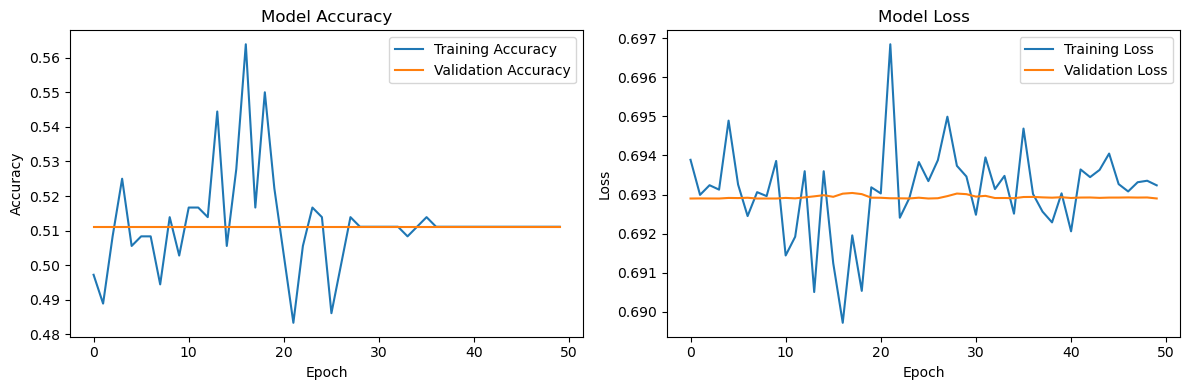

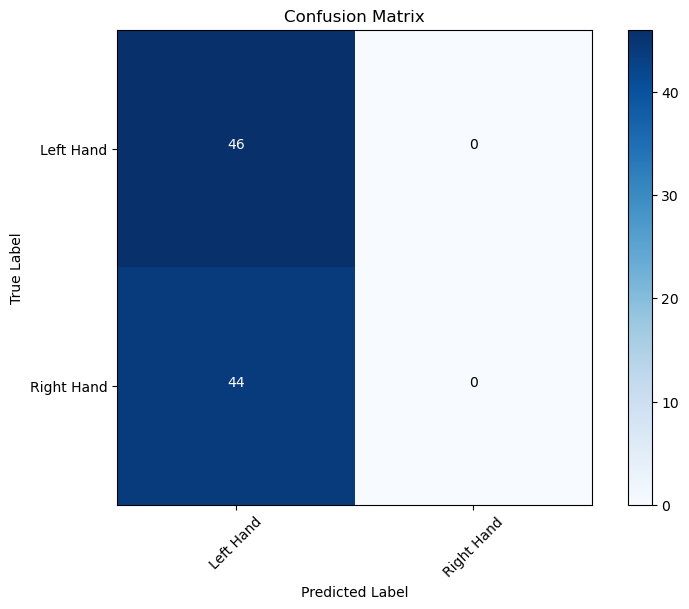


Classification Report:
              precision    recall  f1-score   support

   Left Hand       0.51      1.00      0.68        46
  Right Hand       0.00      0.00      0.00        44

    accuracy                           0.51        90
   macro avg       0.26      0.50      0.34        90
weighted avg       0.26      0.51      0.35        90

6. Per-Subject Performance Analysis
Subject 1 accuracy: 0.5000 (8 samples)
Subject 2 accuracy: 0.2500 (4 samples)
Subject 3 accuracy: 0.6364 (11 samples)
Subject 4 accuracy: 0.8000 (5 samples)
Subject 5 accuracy: 0.5455 (11 samples)
Subject 6 accuracy: 0.4444 (9 samples)
Subject 7 accuracy: 0.3333 (9 samples)
Subject 8 accuracy: 0.4444 (9 samples)
Subject 9 accuracy: 0.6364 (11 samples)
Subject 10 accuracy: 0.4615 (13 samples)


c:\Users\cmmon\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cmmon\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cmmon\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


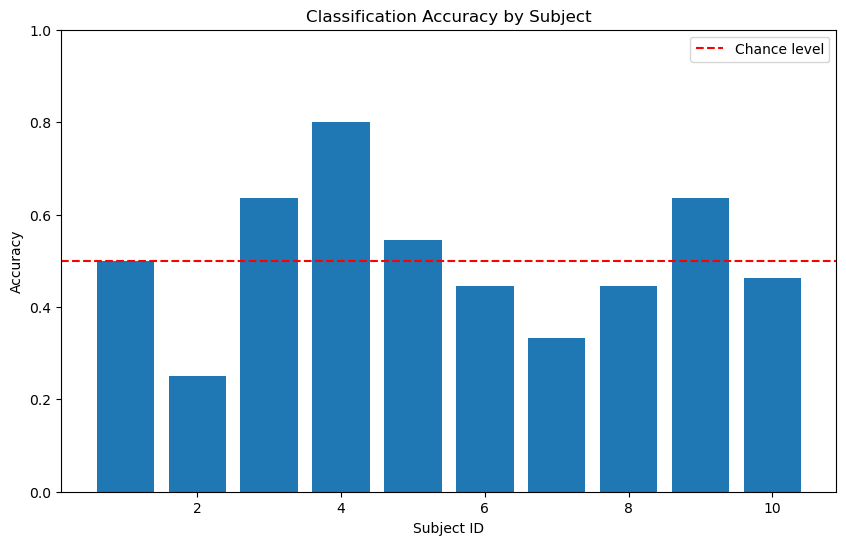

7. Leave-One-Subject-Out Cross-Validation

Leave-one-subject-out: Testing on subject 1
Accuracy on subject 1: 0.5111

Leave-one-subject-out: Testing on subject 2
Accuracy on subject 2: 0.5111

Leave-one-subject-out: Testing on subject 3
Accuracy on subject 3: 0.5111

Leave-one-subject-out: Testing on subject 4
Accuracy on subject 4: 0.5111

Leave-one-subject-out: Testing on subject 5
Accuracy on subject 5: 0.4667

Leave-one-subject-out: Testing on subject 6
Accuracy on subject 6: 0.5333

Leave-one-subject-out: Testing on subject 7
Accuracy on subject 7: 0.5111

Leave-one-subject-out: Testing on subject 8
Accuracy on subject 8: 0.4889

Leave-one-subject-out: Testing on subject 9
Accuracy on subject 9: 0.5333

Leave-one-subject-out: Testing on subject 10
Accuracy on subject 10: 0.5333


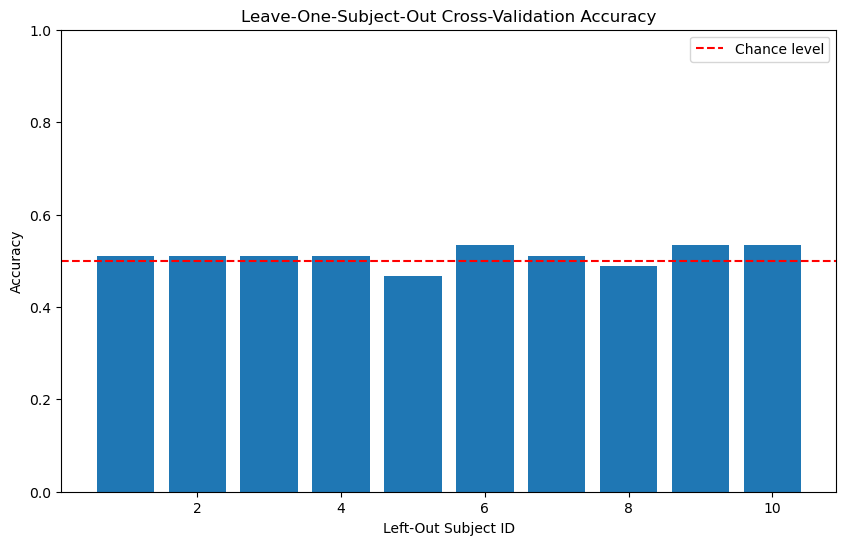

Average LOSO accuracy: 0.5111 ± 0.0199


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne.io import read_raw_edf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

print("1. Loading Data from Multiple Subjects")
# Parameters
subjects = list(range(1, 11))  # Use first 10 subjects
runs = [4, 8, 12]  # Motor imagery runs (left/right hand)

# Function to load data for a single subject
def load_subject_data(subject_id, runs):
    print(f"Loading data for subject {subject_id}...")
    
    # Download and load the data
    raw_fnames = eegbci.load_data(subject_id, runs)
    raw_files = [read_raw_edf(f, preload=True) for f in raw_fnames]
    raw = mne.concatenate_raws(raw_files)
    eegbci.standardize(raw)
    
    # Apply bandpass filter (8-30 Hz, mu and beta rhythms)
    raw.filter(8., 30., fir_design='firwin')
    
    # Extract events
    events, event_id = mne.events_from_annotations(raw)
    
    # Create epochs
    tmin, tmax = 0., 4.  # Define epoch window (seconds)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False)
    
    # Extract epochs for left and right hand motor imagery
    event_dict = {'left_hand': event_id['T1'], 'right_hand': event_id['T2']}
    epochs = mne.Epochs(raw, events, event_dict, tmin, tmax, proj=True, picks=picks,
                       baseline=None, preload=True)
    
    # Get the data and labels
    X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
    y = epochs.events[:, 2] - event_id['T1']  # Convert event IDs to 0 and 1
    
    return X, y, epochs.info

# Load data from all subjects
X_all = []
y_all = []
subject_indices = []  # To keep track of which subject each sample belongs to

for subject in subjects:
    try:
        X, y, info = load_subject_data(subject, runs)
        X_all.append(X)
        y_all.append(y)
        subject_indices.extend([subject] * len(y))
    except Exception as e:
        print(f"Error loading data for subject {subject}: {e}")
        continue

# Combine data from all subjects
X_combined = np.concatenate(X_all, axis=0)
y_combined = np.concatenate(y_all, axis=0)
subject_indices = np.array(subject_indices)

print(f"Combined data shape: {X_combined.shape}")
print(f"Combined labels shape: {y_combined.shape}")
print(f"Number of subjects included: {len(np.unique(subject_indices))}")

print("2. Preparing Data (Ignoring Time Domain)")
# Average over time to remove time dimension
X_avg = np.mean(X_combined, axis=2)  # shape: (n_epochs, n_channels)

# Reshape for CNN input: [samples, channels, 1]
X_reshaped = X_avg.reshape(X_avg.shape[0], X_avg.shape[1], 1)

print(f"Reshaped data (averaged over time): {X_reshaped.shape}")

# Split data - stratify by both class and subject
X_train, X_test, y_train, y_test, subj_train, subj_test = train_test_split(
    X_reshaped, y_combined, subject_indices, test_size=0.2, random_state=42, stratify=y_combined
)

print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")
print(f"Subjects in training set: {np.unique(subj_train)}")
print(f"Subjects in testing set: {np.unique(subj_test)}")

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("3. Building a Simple CNN Model")
# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, n_channels, n_classes=2):
        super(SimpleCNN, self).__init__()
        
        # Simple convolutional layer
        self.conv = nn.Sequential(
            nn.Conv1d(n_channels, 32, kernel_size=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=1),
            nn.ReLU()
        )
        
        # Fully connected layer
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, n_classes)
        )
    
    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

# Initialize the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = SimpleCNN(X_train.shape[1]).to(device)
print(model)

print("4. Training the Model")
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 50

# Lists to store metrics
train_losses = []
train_accs = []
val_losses = []
val_accs = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / total
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    
    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accs.append(val_epoch_acc)
    
    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"  Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
        print(f"  Validation Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_acc:.4f}")

print("Training complete")

print("5. Evaluating the Model")
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accs, label='Training Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
model.eval()

# Make predictions
with torch.no_grad():
    outputs = model(X_test_tensor.to(device))
    _, predicted = torch.max(outputs, 1)

# Convert predictions to numpy for evaluation
y_pred = predicted.cpu().numpy()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Left Hand', 'Right Hand']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=classes))

print("6. Per-Subject Performance Analysis")
# Analyze performance for each subject in the test set
unique_test_subjects = np.unique(subj_test)
subject_accuracies = {}

for subject in unique_test_subjects:
    # Get indices for this subject
    subject_mask = (subj_test == subject)
    
    # Get predictions and true labels for this subject
    subject_y_true = y_test[subject_mask]
    subject_y_pred = y_pred[subject_mask]
    
    # Calculate accuracy
    accuracy = np.mean(subject_y_pred == subject_y_true)
    subject_accuracies[subject] = accuracy
    
    print(f"Subject {subject} accuracy: {accuracy:.4f} ({np.sum(subject_mask)} samples)")

# Plot per-subject accuracies
plt.figure(figsize=(10, 6))
subjects = list(subject_accuracies.keys())
accuracies = list(subject_accuracies.values())

plt.bar(subjects, accuracies)
plt.axhline(y=0.5, color='r', linestyle='--', label='Chance level')
plt.xlabel('Subject ID')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy by Subject')
plt.ylim(0, 1)
plt.legend()
plt.show()

print("7. Leave-One-Subject-Out Cross-Validation")
# Implement leave-one-subject-out cross-validation
unique_subjects = np.unique(subject_indices)
loso_accuracies = []

for test_subject in unique_subjects:
    print(f"\nLeave-one-subject-out: Testing on subject {test_subject}")
    
    # Split data
    train_mask = (subject_indices != test_subject)
    test_mask = (subject_indices == test_subject)
    
    X_train_loso = X_reshaped[train_mask]
    y_train_loso = y_combined[train_mask]
    X_test_loso = X_reshaped[test_mask]
    y_test_loso = y_combined[test_mask]
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_loso)
    y_train_tensor = torch.LongTensor(y_train_loso)
    X_test_tensor = torch.FloatTensor(X_test_loso)
    y_test_tensor = torch.LongTensor(y_test_loso)
    
    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Initialize a new model
    model_loso = SimpleCNN(X_train_loso.shape[1]).to(device)
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_loso.parameters(), lr=0.001)
    
    # Training loop
    for epoch in range(30):  # Fewer epochs for LOSO
        model_loso.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model_loso(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
    # Evaluate on the left-out subject
    model_loso.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_loso(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    loso_accuracies.append(accuracy)
    print(f"Accuracy on subject {test_subject}: {accuracy:.4f}")

# Plot LOSO results
plt.figure(figsize=(10, 6))
plt.bar(unique_subjects, loso_accuracies)
plt.axhline(y=0.5, color='r', linestyle='--', label='Chance level')
plt.xlabel('Left-Out Subject ID')
plt.ylabel('Accuracy')
plt.title('Leave-One-Subject-Out Cross-Validation Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

print(f"Average LOSO accuracy: {np.mean(loso_accuracies):.4f} ± {np.std(loso_accuracies):.4f}")

Waarom presteerd het zo slecht ??? 

We zijn eigenlijk 1 % beter dan random chance. dit  is hoogwaarschijnlijk omdat de binary classification geen rekening  houd met tijd. 

1. **Loss of Temporal Information**: By averaging over time, we're discarding valuable temporal dynamics that are crucial for motor imagery classification. Different subjects imagine movements at different speeds and times, so temporal information is important.
2. **Simple Architecture**: The 1x1 convolutions might be too simple to capture the complex spatial patterns in EEG data.